In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

## 練習
別に用意したCSVファイルで同様に行ってみる。

data/body_sample.csv

In [2]:
df2 = pd.read_csv('data/body_sample.csv', index_col='id')
df2.head()

,gender,height,weight
id,,,
1,M,157.67,64.82
2,M,178.76,72.38
3,M,161.95,64.52
4,M,162.26,63.35
5,M,167.95,68.76


In [3]:
any(df2.ix[:,0].isnull()) or any(df2.ix[:,1].isnull()) or any(df2.ix[:,2].isnull())   #nullデータなし


False

In [4]:
model = pd.ols(y=df2.weight, x=df2.height, intercept=True)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         400
Number of Degrees of Freedom:   2

R-squared:         0.7972
Adj R-squared:     0.7967

Rmse:              4.1339

F-stat (1, 398):  1564.7700, p-value:     0.0000

Degrees of Freedom: model 1, resid 398

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.9971     0.0252      39.56     0.0000     0.9476     1.0465
     intercept   -99.7402     3.9971     -24.95     0.0000  -107.5745   -91.9059
---------------------------------End of Summary---------------------------------

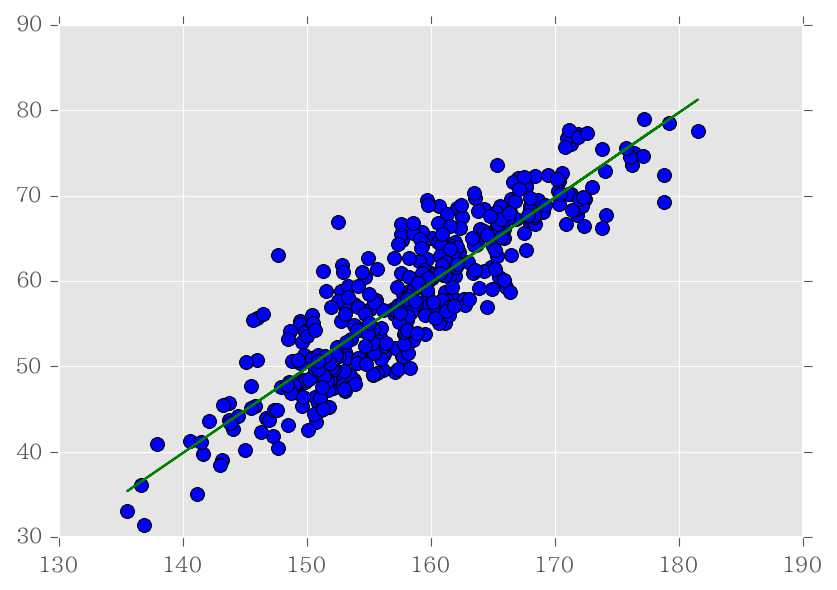

In [5]:
matplotlib.pyplot.plot(df2.height, df2.weight, 'bo')
matplotlib.pyplot.plot(model.x['x'], model.y_fitted, 'g-')


### 応用
男女別に、それぞれモデルに適用するか試してみる


In [6]:
height_m = df2.ix[df2.gender=='M', :].height
weight_m = df2.ix[df2.gender=='M', :].weight
height_f = df2.ix[df2.gender=='F', :].height
weight_f = df2.ix[df2.gender=='F', :].weight


In [7]:
model_m = pd.ols(y=weight_m, x=height_m, intercept=True)
model_m


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         200
Number of Degrees of Freedom:   2

R-squared:         0.7456
Adj R-squared:     0.7443

Rmse:              3.1402

F-stat (1, 198):   580.1733, p-value:     0.0000

Degrees of Freedom: model 1, resid 198

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.7055     0.0293      24.09     0.0000     0.6481     0.7629
     intercept   -49.8518     4.7658     -10.46     0.0000   -59.1928   -40.5107
---------------------------------End of Summary---------------------------------

In [8]:
model_f = pd.ols(y=weight_f, x=height_f, intercept=True)
model_f


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         200
Number of Degrees of Freedom:   2

R-squared:         0.8415
Adj R-squared:     0.8407

Rmse:              2.5539

F-stat (1, 198):  1051.5997, p-value:     0.0000

Degrees of Freedom: model 1, resid 198

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.9005     0.0278      32.43     0.0000     0.8460     0.9549
     intercept   -87.3478     4.2857     -20.38     0.0000   -95.7477   -78.9479
---------------------------------End of Summary---------------------------------

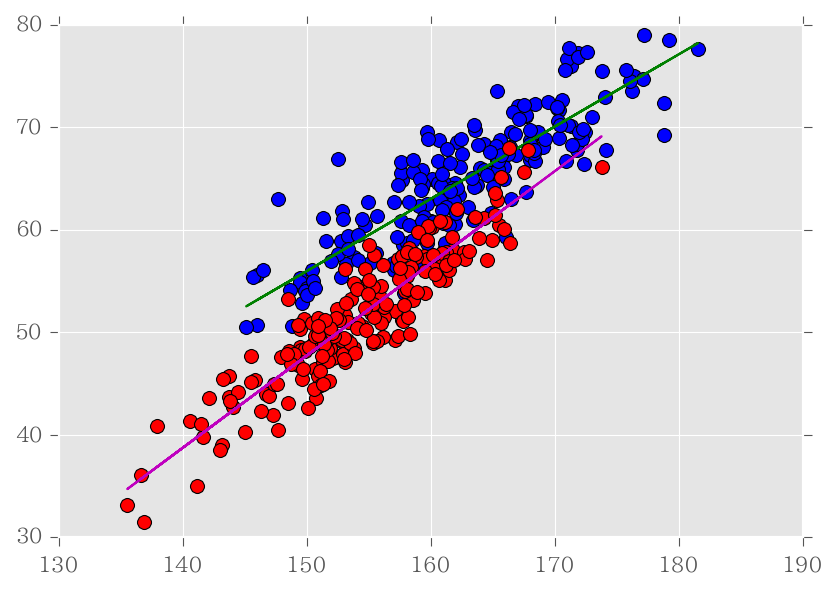

In [9]:

matplotlib.pyplot.plot(height_m, weight_m, 'bo')
matplotlib.pyplot.plot(model_m.x['x'], model_m.y_fitted, 'g-')

matplotlib.pyplot.plot(height_f, weight_f, 'ro')
matplotlib.pyplot.plot(model_f.x['x'], model_f.y_fitted, 'm-')

男性の決定係数0.7456に対し、女性の決定係数0.8415のほうが高い

→男性のほうが身長に対する体重のばらつきが多い？（デカいヤセ・チビデブ）
